# 1. Install and Import Dependencies

In [7]:
# pytorch setup  (uncomment it and then run it once)
# !pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [3]:
# we cloned the repository from github (uncomment it and then run it once)
# !git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
import torch # It will be used to load and detect the YOLO model.
import matplotlib.pyplot as plt # it will be used to visualization
import numpy as np # to be used for array conversion
import cv2 # will help access images

# 2. Load Model

In [4]:
# we load the pre-trained ultralytics model from torch.hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\selim/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-4 Python-3.9.12 torch-1.12.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [25]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections

In [5]:
img = 'datas/humans.jpg'

In [6]:
results = model(img)
results.print() # prints the results of the object detection model

image 1/1: 145x347 17 persons
Speed: 10.4ms pre-process, 193.2ms inference, 0.0ms NMS per image at shape (1, 3, 288, 640)


In [2]:
# life saving solution :D
# "the kernel appears to have died. It will restart automatically." solved error
# run this block if the code in the below block doesn't work

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

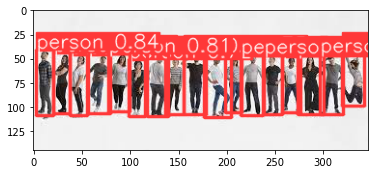

In [7]:
%matplotlib inline
# results.xyxy # xyxy -> xmin, xmax, ymin, ymax, confidence, class
# results.show() # Opens in photos app
# results.render() # shows array
# np.array(results.render()).shape # (1, 1086, 1600, 3)
plt.imshow(np.squeeze(results.render())) # render -> processes the model and turns it into a picture or video.

In [8]:
results.render() # This is the array representation of the image

[array([[[239, 239, 239],
         [239, 239, 239],
         [240, 240, 240],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[239, 239, 239],
         [239, 239, 239],
         [240, 240, 240],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[239, 239, 239],
         [239, 239, 239],
         [240, 240, 240],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [239, 239, 239]],
 
        ...,
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [241, 241, 241],
         [241, 241, 241],
         [241, 241, 241]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [241, 241, 241],
         [241, 241, 241],
         [241, 241, 241]],
 
        [[243, 243, 243],
         [243, 243, 243],
         [243, 243, 243],
         ...,
         [241, 241, 241],
  

# 4. Real Time Detections

In [37]:
# When you type the name of the video file, the video opens.
#cap = cv2.VideoCapture('datas/fb-dk.mp4')

# When 0 is entered as a parameter, the webcam opens (camera).
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    # let's make sure we have enough parentheses (we squeezed it with squeeze, so we gathered it in one parenthesis)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # If q is pressed, the loop will be broken, then the program will close.
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()